# Using Machine Learning to Predict Poverty

The Goal of this projet is to predict the Poverty based on different features, doing so will help the authorities to release funding immediately based on the population.


#### Importing Libraries

In [1]:
# Import Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [2]:
# Path to the data set
income_path = "acs2017_census_tract_data.csv"

# Import the data into a Pandas DataFrame
df = pd.read_csv(income_path)
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [3]:
df.County.value_counts
#You can show counts of data values

<bound method IndexOpsMixin.value_counts of 0         Autauga County
1         Autauga County
2         Autauga County
3         Autauga County
4         Autauga County
              ...       
73996    Yauco Municipio
73997    Yauco Municipio
73998    Yauco Municipio
73999    Yauco Municipio
74000    Yauco Municipio
Name: County, Length: 74001, dtype: object>

In [4]:
# now lets check the states
df["State"].unique() #We can show unique datas.

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [5]:
# lets see the whole description of the data
df.describe()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,...,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,2.839113e+10,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,...,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,1.647593e+10,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,...,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,...,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,2.804700e+10,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,...,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,4.200341e+10,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,...,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,7.215375e+10,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,...,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [6]:
# shape of the data
df.shape

(74001, 37)

In [7]:
# lets check the NaN values in our data
df.isnull().sum()

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

We have huge number of missing values in the dataset, lets remove them

In [8]:
df = df.dropna()
df.shape

(72718, 37)

In [9]:
# lets check the NaN values again in our data
df.isnull().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

There is no missing values left
- we have a column of race, let's do some visualization of the race column

<AxesSubplot:title={'center':'Percentage of Americans by Race'}>

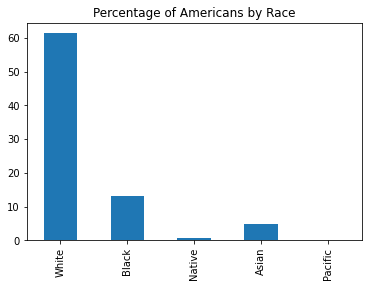

In [10]:
#Lets see how many of each race is in the US as a percentage of the total 
race_columns = ['White','Black','Native','Asian','Pacific']
census_races =df[race_columns]

#There are more white people than black people as expected
(census_races.sum()/len(census_races)).plot.bar(title = "Percentage of Americans by Race")

We can see that the number of white people are higher than the other races

<AxesSubplot:>

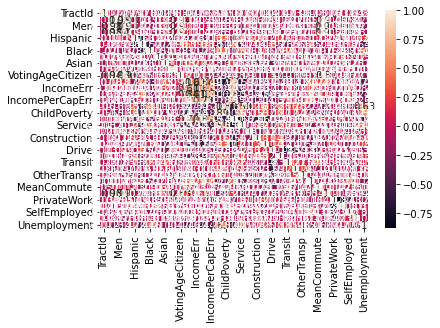

In [11]:
# lets draw the correlation graph
f = ( df.corr())

sns.heatmap(f, annot=True)

the graph is not so visible, lets draw it with the races and see how much they are correlated

<AxesSubplot:>

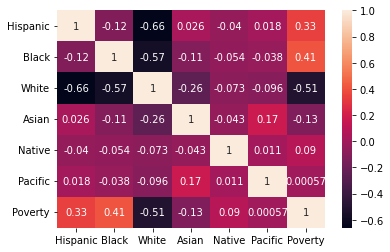

In [12]:
f = ( df.loc[:, ['Hispanic', 'Black', 'White', 'Asian', 'Native','Pacific','Poverty']]).corr()

sns.heatmap(f, annot=True)

we can see that the Hispanic race is correlated with the poverty than the other races

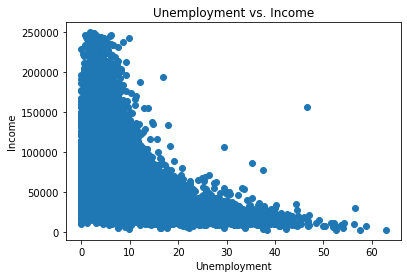

In [13]:
#Unemployment vs Income 

plt.figure()
plt.scatter(df['Unemployment'], df['Income'])
plt.title("Unemployment vs. Income")
plt.xlabel("Unemployment")
plt.ylabel("Income")
plt.show()

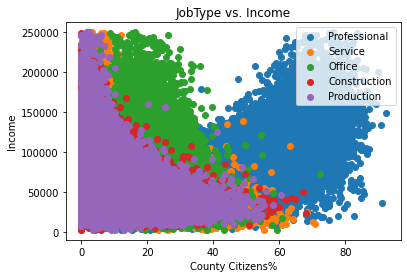

In [14]:
# let draw scatter plot of job type vs income
plt.figure()
plt.scatter(df['Professional'], df['Income'], label="Professional")
plt.scatter(df['Service'], df['Income'], label="Service")
plt.scatter(df['Office'], df['Income'], label="Office")
plt.scatter(df['Construction'], df['Income'], label="Construction")
plt.scatter(df['Production'], df['Income'], label="Production")
plt.title("JobType vs. Income")
plt.xlabel("County Citizens%")
plt.ylabel("Income")
plt.legend(loc='upper right')
plt.show()

In [15]:
#Finding the Duplicates rows in dataframe
df.duplicated().sum()

0

- Drop the redundant columns and the TractId columns, as it add no value anymore. 
- Also dropping the IncomeErr, IncomePerCap and IncomePerCapErr columns too as they are not target variables

In [16]:
df = df.drop(['TractId','State','County','TotalPop','IncomeErr','IncomePerCap','IncomePerCapErr'], axis=1)

#### Scalling the data
Lets normalize the data using standard scaler

In [17]:
from sklearn.preprocessing import StandardScaler
#import sklearn StandardScaler library for z-score normalization  
scaler = StandardScaler()

#create a new dataframe with normalized values
normdf = pd.DataFrame(scaler.fit_transform(df),columns = df.columns) 

normdf.head()

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,-1.168568,-1.167638,-0.644723,0.815039,-0.373216,-0.161521,-0.394915,-0.143896,-1.146478,0.219791,...,-0.461123,-0.758742,-0.666359,-0.222719,-1.071607,-0.667542,0.984056,-0.439011,-0.379143,-0.514752
1,-0.924920,-1.115175,-0.701038,-0.644419,1.911188,-0.161521,-0.417148,-0.143896,-0.984505,-0.650031,...,-0.556169,-0.557599,-1.223284,-0.546862,-1.097497,-0.453901,0.118707,0.745612,-0.379143,-0.750074
2,-0.592176,-0.362016,-0.402133,0.002052,0.613758,-0.028358,-0.450498,0.250118,-0.437103,-0.469145,...,-0.366077,-0.436913,-0.825481,-0.420024,-0.535049,-0.780645,0.970099,-0.360036,1.170809,-0.495141
3,-0.166701,0.006116,-0.332822,0.619138,-0.285176,-0.050552,-0.506081,-0.143896,0.076582,-0.171251,...,-0.271030,0.407887,-0.666359,-0.025415,-0.207400,-0.466468,0.774697,-0.439011,-0.379143,-0.220599
4,2.608887,2.358069,-0.709702,0.527718,0.145756,-0.161521,-0.183698,-0.143896,2.702524,0.230180,...,-0.404095,-0.638056,-1.037643,-0.715981,2.415575,-1.019420,1.388816,-0.439011,-0.379143,-0.965787


#### outliers
Lets check the outliers

Men
Number of outliers =  32482


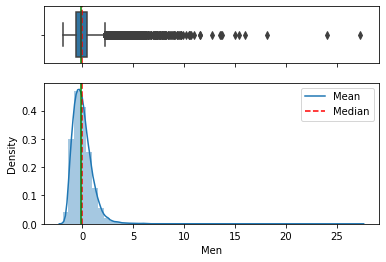

Women
Number of outliers =  31865


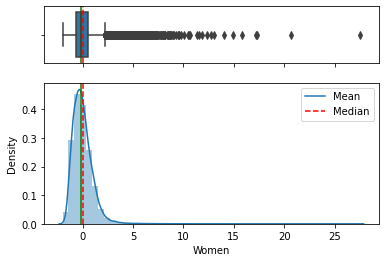

Hispanic
Number of outliers =  57606


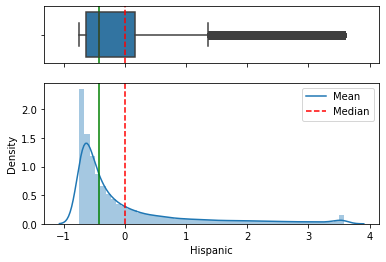

White
Number of outliers =  15318


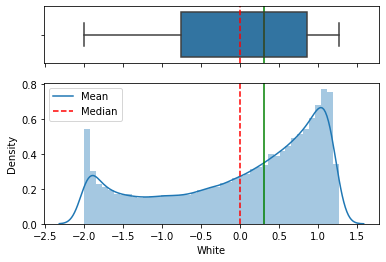

Black
Number of outliers =  69379


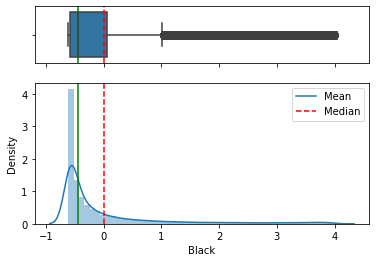

Native
Number of outliers =  72718


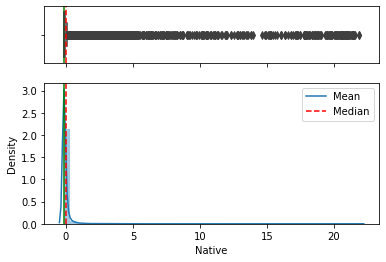

Asian
Number of outliers =  71944


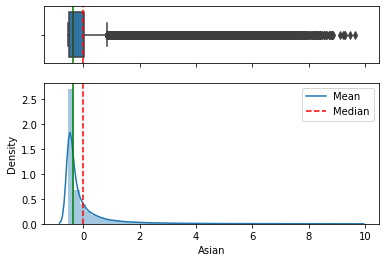

Pacific
Number of outliers =  72718


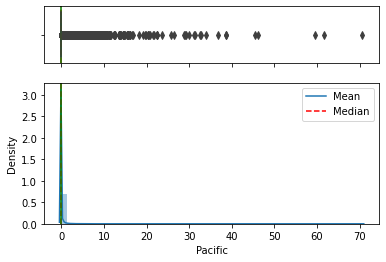

VotingAgeCitizen
Number of outliers =  30186


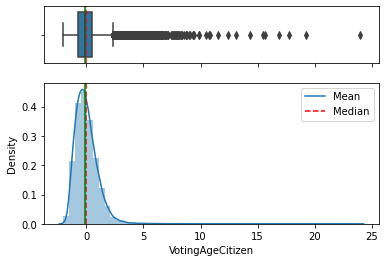

Income
Number of outliers =  34665


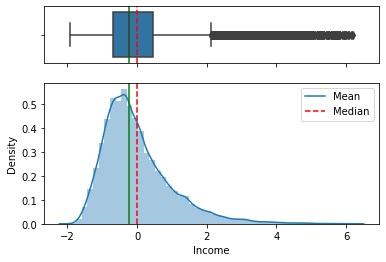

Poverty
Number of outliers =  31830


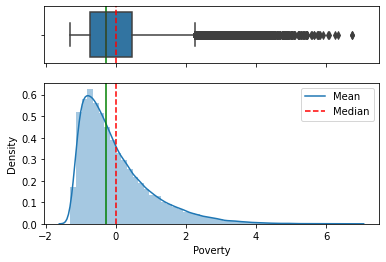

ChildPoverty
Number of outliers =  24775


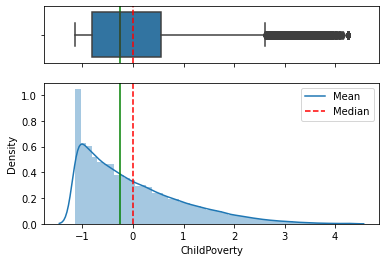

Professional
Number of outliers =  24657


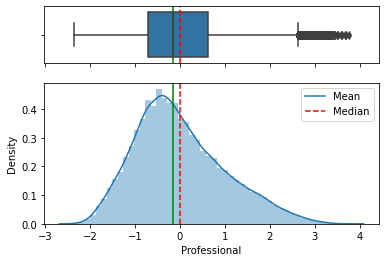

Service
Number of outliers =  28639


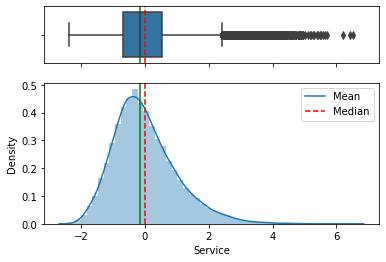

Office
Number of outliers =  25790


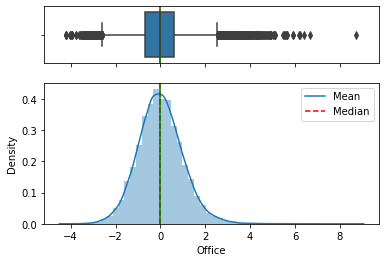

Construction
Number of outliers =  28047


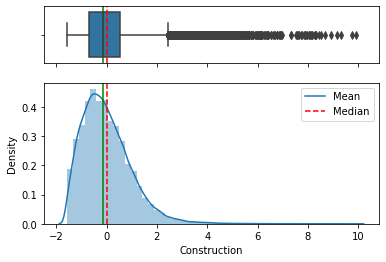

Production
Number of outliers =  24413


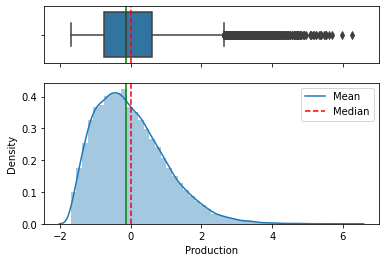

Drive
Number of outliers =  45725


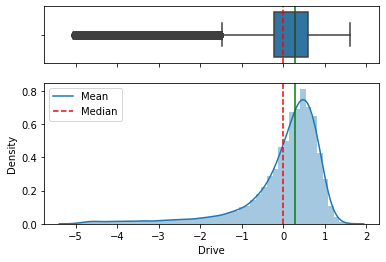

Carpool
Number of outliers =  30925


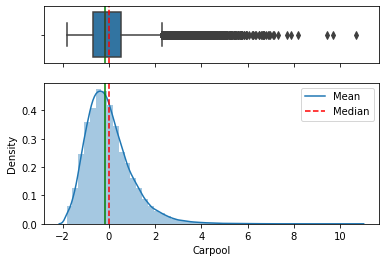

Transit
Number of outliers =  72710


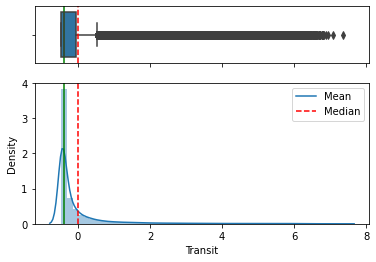

Walk
Number of outliers =  71357


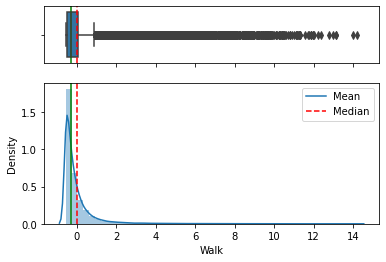

OtherTransp
Number of outliers =  52862


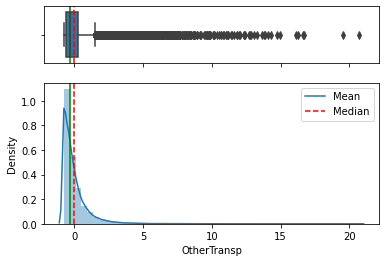

WorkAtHome
Number of outliers =  34092


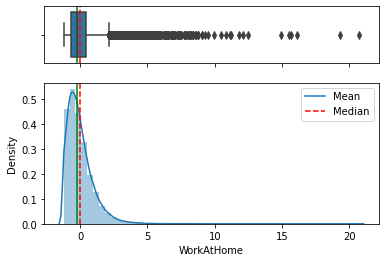

MeanCommute
Number of outliers =  26043


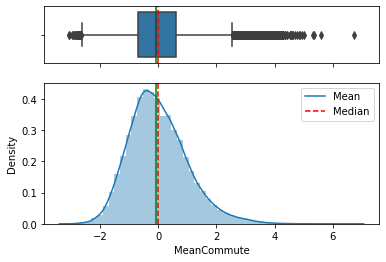

Employed
Number of outliers =  30579


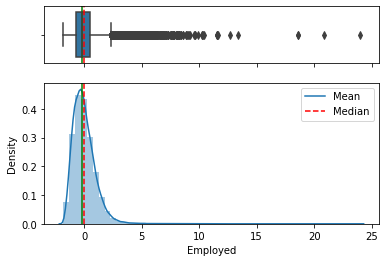

PrivateWork
Number of outliers =  26562


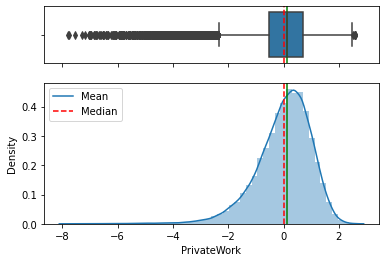

PublicWork
Number of outliers =  32755


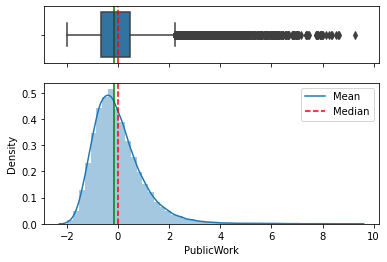

SelfEmployed
Number of outliers =  31878


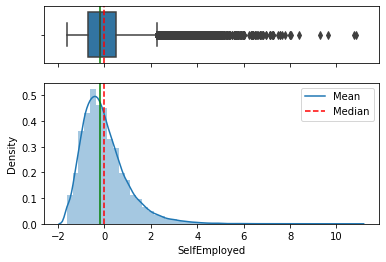

FamilyWork
Number of outliers =  72718


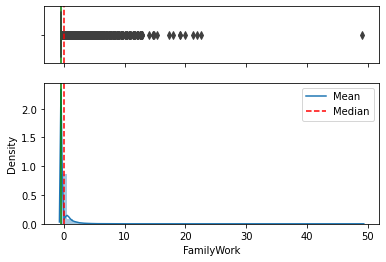

Unemployment
Number of outliers =  42263


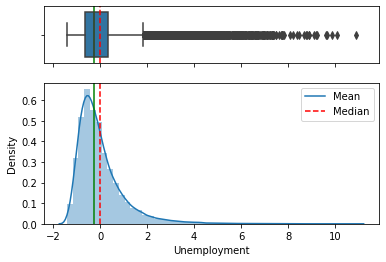

In [18]:
# Histograms of various Input variables alongside Box Plots and visualization of Mean and Median values 

for col in normdf.columns:
    
    print(col)
    Q1 = normdf[col].quantile(0.25)
    Q3 = normdf[col].quantile(0.75)
    IQR = Q3-Q1

    print('Number of outliers = ',len(normdf[((normdf < (Q1 - 1.5 * IQR)) |(normdf > (Q3 + 1.5 * IQR))).any(axis=1)]))

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.4, 1)})

    mean = normdf[col].mean()
    median = normdf[col].median()

    sns.boxplot(normdf[col], ax = ax_box)
    ax_box.axvline(mean, color = 'r', linestyle='--')
    ax_box.axvline(median, color = 'g', linestyle='-')

    sns.distplot(normdf[col])
    ax_hist.axvline(mean, color = 'r', linestyle='--')
    ax_hist.axvline(median, color = 'g', linestyle='-')

    plt.legend({'Mean':mean,'Median':median})

    ax_box.set(xlabel = '')
    plt.show()
    print('===================================================')

We can see that we have huge number of outliers, there are many ways to deal with the outliers, 
- we will use the IQR (Inter Quartile Range) method to remove the outliers
in this method, the values below 25% and above 75% will be removed

In [19]:
#Find the outliers records which fall with +/- 5% boundaries 

Q1 = normdf.quantile(0.05)
Q3 = normdf.quantile(0.95)
IQR = Q3 - Q1

print("Number of outliers for entire dataset = ", len(normdf[((normdf < (Q1 - 1.5 * IQR)) |(normdf > (Q3 + 1.5 * IQR))).any(axis=1)]))

Number of outliers for entire dataset =  5326


#### Feature Selection
The goal of this project is to predict the Poverty based on all the give features so
- we will select the Poverty feature as dependent feature and store it in Y
- we will store all the other independent features in X

In [20]:
normdf.Poverty

0       -0.430197
1        0.511184
2       -0.108357
3       -1.106060
4       -0.309507
           ...   
72713    1.879001
72714    1.565208
72715    2.957163
72716    2.739922
72717    4.292797
Name: Poverty, Length: 72718, dtype: float64

In [21]:
X = normdf.drop('Poverty', axis = 1)
Y = normdf['Poverty']  

#### Splitting the data

Now we will split the data into test and train set
- Train set data will be used to train the models
- Test set data will be used to test the models
- 80% data will be training data and 20% will be testing data

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

#### Model Building

The goal is to train the following machine learning models on the data
- Decision Tree
- bayesian (Bayesian Ridge)
- Random Forest
- XGBoost
- Gradient Boost

#### Decision Tree

In [23]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeRegressor  
decision_Regressor= DecisionTreeRegressor(random_state=0)  
decision_Regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [24]:
# lets perform some predictions using the testing data
pred = decision_Regressor.predict(X_test)
pred

array([ 1.79854145,  0.71233333,  0.60773551, ..., -0.62330036,
        3.36750874,  0.10888437])

In [25]:
# Accuracy of the decision tree
decision_Regressor.score(X_test,y_test)

0.8484453624457164

Decision Tree gave us the accuracy of 85% 
- now lets train the Bayesain network 

#### Bayesian Ridge

In [26]:
#Import BayesianRidge model
from sklearn.linear_model import BayesianRidge
# Creating and training model
Bayesian_model = BayesianRidge()
Bayesian_model.fit(X_train, y_train)

BayesianRidge()

In [27]:
# doing predictions 
Bayesian_model.predict(X_test)

array([ 1.65017123,  0.6923098 ,  0.72391497, ..., -0.5705551 ,
        1.92170854,  0.1022229 ])

In [28]:
Bayesian_model.score(X_test,y_test)

0.8724135561704937

Bayesian gave us the accuracy of 87%, which is slightly higher than decision tree

#### Random Forest

In [29]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# create regressor object
Random_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
Random_regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [30]:
# performing predictions
Random_regressor.predict(X_test)

array([ 1.72363332,  0.77517248,  0.80775873, ..., -0.6121969 ,
        1.98480603,  0.15160856])

In [31]:
# Accuracy 
Random_regressor.score(X_test,y_test)

0.9278968544473465

We got the accuracy of 92% with Random Forest

#### XGBoost

In [32]:
import xgboost as xg
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)

[15:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [33]:
xgb_r.predict(X_test)

array([ 1.7101762 ,  0.84052557,  0.89197856, ..., -0.5633043 ,
        1.8306133 ,  0.13422106], dtype=float32)

In [34]:
xgb_r.score(X_test,y_test)

0.923447765040846

XGBoost also gave us the accuracy of 92%

#### Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators = 50, max_depth = 1, random_state = 1)
  
# Fit to training set
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=50, random_state=1)

In [36]:
# performing predictions 
gbr.predict(X_test)

array([ 1.78529026,  0.84630258,  0.74409841, ..., -0.51128992,
        1.58375273,  0.21576402])

In [37]:
# Accuracy
gbr.score(X_test,y_test)

0.883537684042817

Gradient Boosting gave the accuracy of 88%

In [38]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['bad', 'good'],
    mode='regression'
)

In [40]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=Random_regressor.predict
)

exp.show_in_notebook(show_table=True)